<a href="https://colab.research.google.com/github/belovelace/Machine_learning_class/blob/homework/sales_classfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:

df = pd.read_csv("/content/sample_data/sales data.csv")
df  # print(df) 와 동일

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [ ]:

# 결측치 확인
df.isnull().sum()

# 결측치 제거
df = df.dropna()
df.isnull().sum()

df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [ ]:
# 데이터 불러오기

X = df.drop('Delicassen', axis=1) # 입력 데이터 (features)
y = df['Delicassen'] # 정답 데이터 (target)


X = X.select_dtypes(include=np.number)

# 데이터를 훈련 데이터와 테스트 데이터로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤포레스트
- 결정트리의 집합의 모임

- 과적합 우려: 억제를 위해 배깅(중복추출) 기법 활용.
- 부트스트래핑은 배깅이라는 앙상블 기법의 구성 요소.

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# 1. 데이터 준비 및 분할
iris = load_iris()
X = iris.data
y = iris.target

# 훈련 세트와 테스트 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. 랜덤 포레스트 분류 모델 객체 생성 및 학습
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 3. 예측 및 평가
y_preds = model.predict(X_test)

# 정확도(Accuracy) 계산 및 출력
accuracy = accuracy_score(y_test, y_preds)
print(f'Random Forest Classifier Accuracy: {accuracy:.4f}')

Random Forest Classifier Accuracy: 1.0000


In [4]:


import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# 선형분류(로지스틱 회귀)-산점도


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 2. 모델 생성 및 학습
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)

# 3. 예측 및 평가
preds = model.predict(X_test)

# 정확도(Accuracy) 계산 및 출력
accuracy = accuracy_score(y_test, preds)
print(f'Logistic Regression Accuracy: {accuracy:.4f}')

Logistic Regression Accuracy: 1.0000


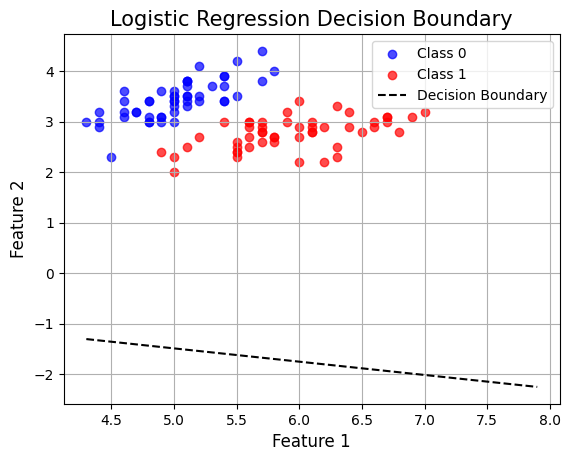

In [13]:
# 시각화 (산점도)

# 클래스별로 데이터 포인트 시각화
plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Class 0', c='blue', alpha=0.7)
plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Class 1', c='red', alpha=0.7)

# 결정 경계선 그리기
# 결정 경계는 y = -(coef[0]/coef[1]) * x - (intercept/coef[1]) 방정식으로 표현됩니다.
x_vals = np.array([X[:, 0].min(), X[:, 0].max()])
y_vals = -(model.coef_[0][0] / model.coef_[0][1]) * x_vals - (model.intercept_[0] / model.coef_[0][1])
plt.plot(x_vals, y_vals, '--', color='black', label='Decision Boundary')


plt.title('Logistic Regression Decision Boundary', fontsize=15)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# 결정 트리
- 비선형 모델
- 목표: 최적의 분할점 찾기. 불순도를 줄여가며 분류.
- 데이터 전처리가 덜 필요하다.
- 과적합 우려
- 멈추기: 트리 최대 깊이 설정 예) Max Depth = 3


In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

#객체 생성
model = DecisionTreeRegressor(max_depth=5, random_state=42)

# 과적합 제어
max_depth=5 # 트리의 최대 깊이를 5로 제한하여 과적합 방지
random_state=42 # 매번 동일한 결과를 얻기 위해 난수 시드 고정
# model_tuned = DecisionTreeClassifier(max_depth=5, random_state=42) # Remove unused DecisionTreeClassifier

model.fit(X_train, y_train)

# 예측
y_preds = model.predict(X_test) # Predict using the DecisionTreeRegressor model (odel)

# 평가
mse = mean_squared_error(y_test, y_preds)
print(f'DecisionTreeRegressor MSE: {mse:.4f}') # Change print statement to reflect Regressor and MSE

DecisionTreeRegressor MSE: 0.0000


Text(0.5, 1.0, 'Sales Data Decision Tree Regression')

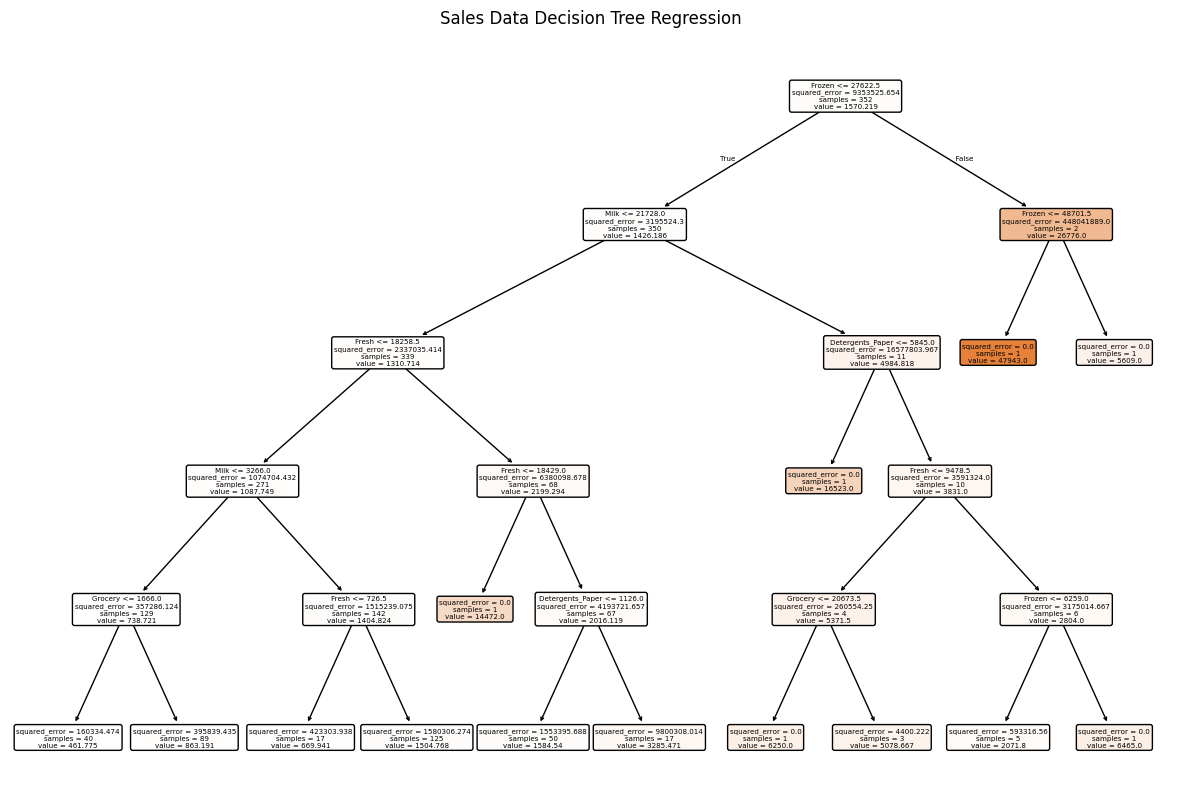

In [ ]:
# 트리 시각화
# plt.figure(figsize=(15, 10)) # 이미지 크기 설정 (plt.subplots에서 처리)

fig, ax = plt.subplots(figsize=(15, 10)) # 그림과 축을 명시적으로 생성

plot_tree(model,
          feature_names=X.columns.tolist(), # 판매 데이터의 특성 이름 사용
          # class_names는 회귀 트리에는 필요하지 않습니다.
          filled=True, # 노드 색상 채우기
          rounded=True, # 노드 모서리 둥글게 처리
          ax=ax) # 생성한 축 객체를 plot_tree에 전달

plt.title("Sales Data Decision Tree Regression") # 제목 수정
